# BLS 3:  Structured Data Download

#### In the previous example, we collected data for three different stocks and then exported them to three different csv files.  What if we wanted all the data in one file?

#### First, as always, we need to import the urllib library.  There are other alternatives as well, but this is pretty widely used.

In [1]:
import urllib.request

#### Also as before, we get the states from the CSV file

In [2]:
Input_File = open('Files_Directory/BLS/states.csv','r')
Input_File = Input_File.read()   
states_for_url = Input_File.splitlines(0)
states_for_url

['21.Indiana', '20.Illinois', '11.California']

#### Now we set the URL list

In [3]:
urls = []
for state in states_for_url:
    urls.append('https://download.bls.gov/pub/time.series/la/la.data.' + state)
urls

['https://download.bls.gov/pub/time.series/la/la.data.21.Indiana',
 'https://download.bls.gov/pub/time.series/la/la.data.20.Illinois',
 'https://download.bls.gov/pub/time.series/la/la.data.11.California']

#### Lets try and open one file, then follow the same procedure as before. We will name the output file all_states.txt.  Previously, we had a loop that went through three websites, got the files and then exported the data to three different files.  Now we do the same thing except that we output to only one file.  To accomplish this, we simply append the new data at the end of the file as opposed to opening a new file which was our procedure earlier.

#### The for loop will iterate through all the elements of the urls list, and through each iteration of the for loop, you can refer to the element by using the variable 'url'.

In [4]:
Output_File = open('Files_Directory/BLS/all_states.txt','w')
for url in urls:
    html = urllib.request.urlopen(url).read().decode('utf-8')
    Output_File.write(html)
Output_File.close()

#### Lets look at our output file, there will be some problems here. First, while the series id identifies the state, let's add a column for state to make this more obvious.  Second, the headings appear each time the new state begins, for example:

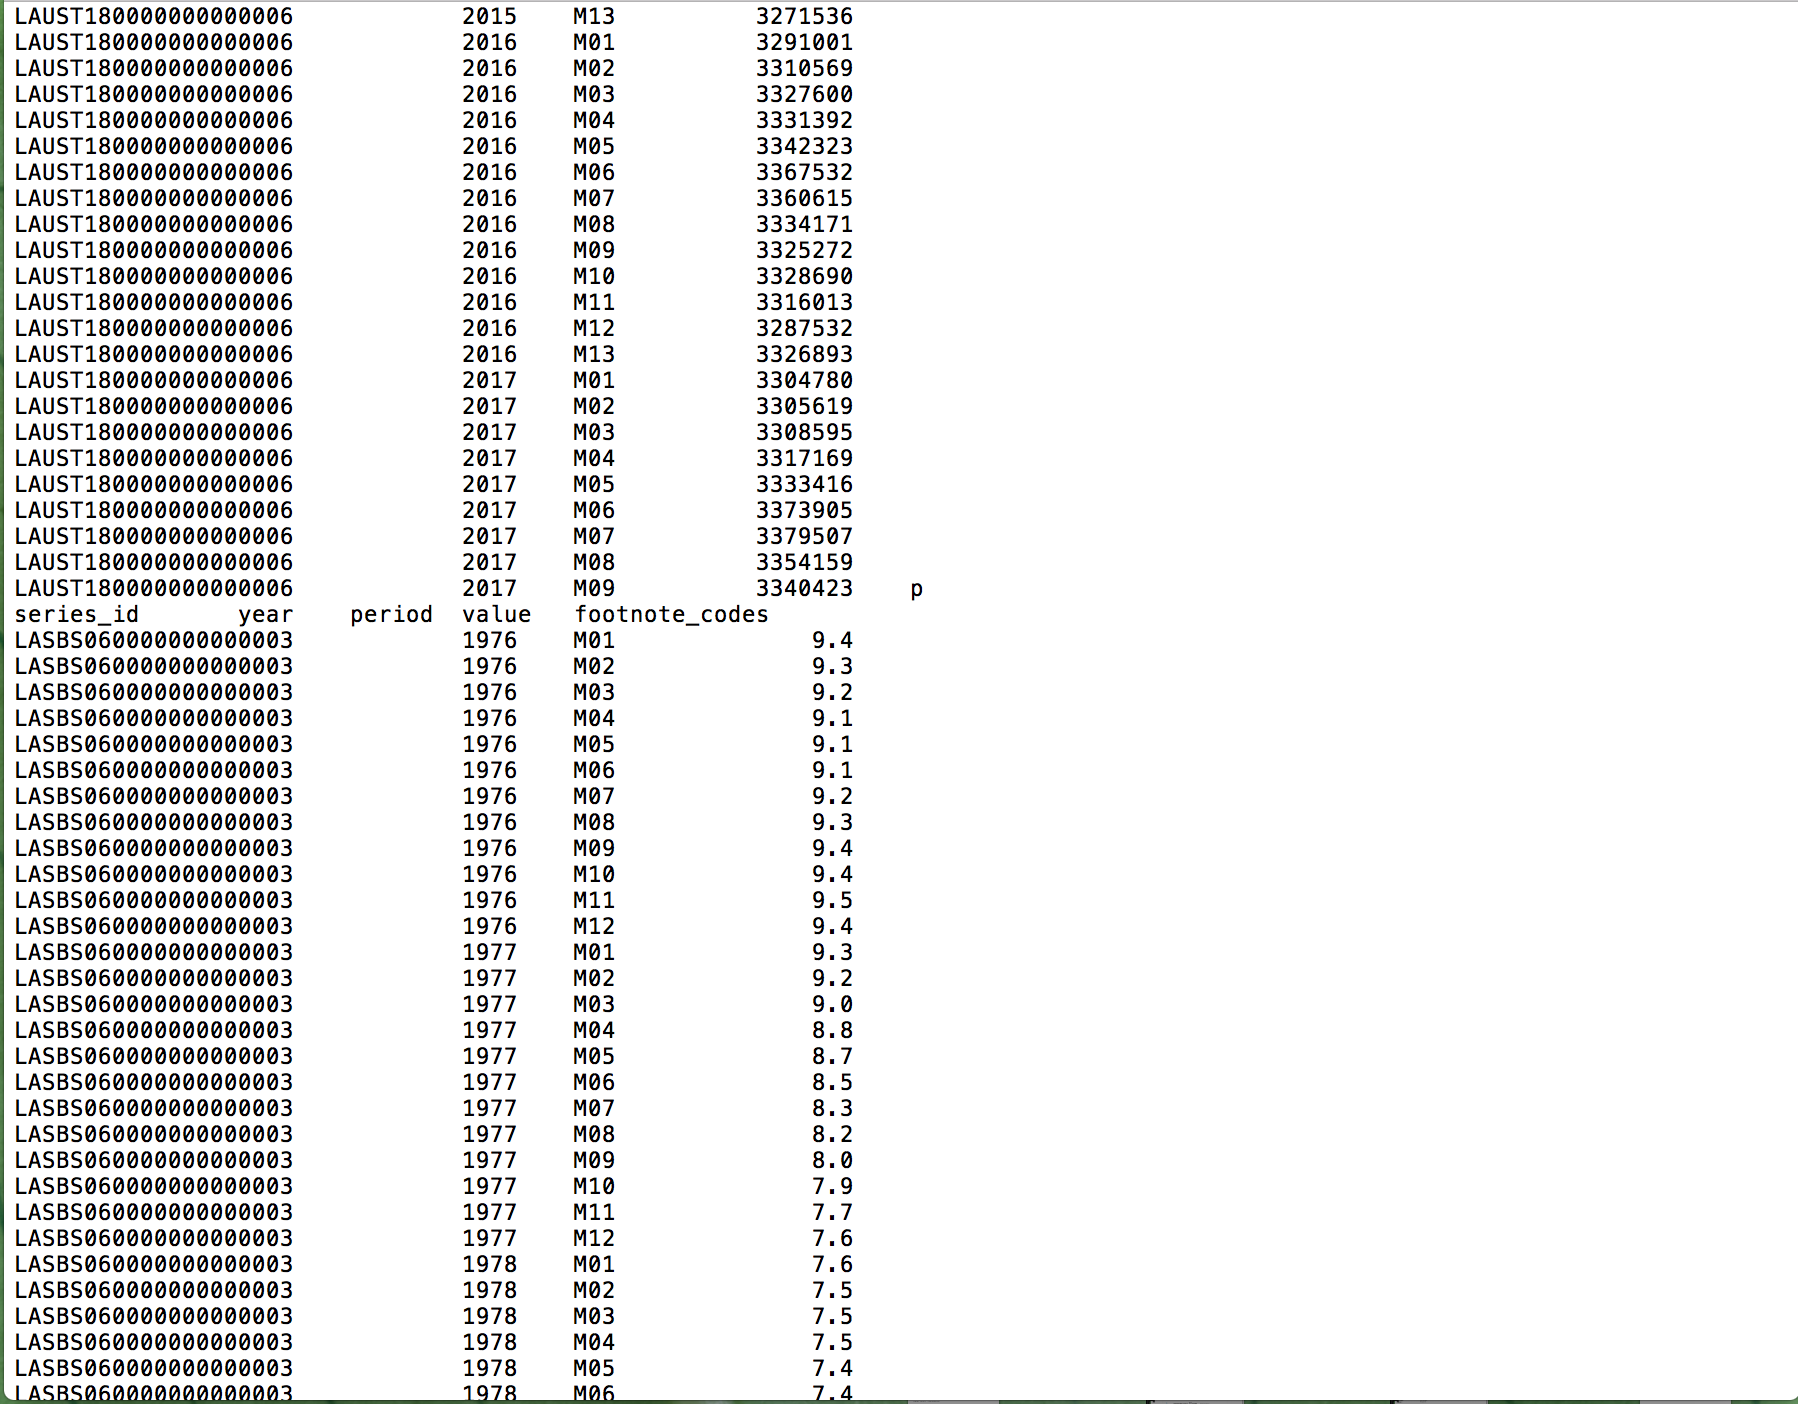

In [5]:
from IPython.display import Image
Image(filename='Files_Directory/Images/bls_6.png',width=800,height=10)

#### Note that we want each output file to be named after the state.  However, the string in the list of states has the code followed by a period followed by the state.  Lets create a list of state names that does not have the fip nor the period:

#### Now, let's try a different approach.  Lets open another file, this time call it all_states_corrected.

In [6]:
state_names = []
for state in states_for_url:
    state_names.append(state[3:])
print(state_names)

['Indiana', 'Illinois', 'California']


In [7]:
Output_File = open('Files_Directory/BLS/all_states_corrected.txt','w')

#### We will now utilize the .splitlines function which is used to split each line (seperated by a new line operator '\n') of the string to an element in a list. We first assign a variable called New_Form_Data which will be an empty string. We will add to this string as we iterate through each row. Of course, we also need a 'for' loop which will iterate through all the states we have. 

#### In this case, we cannot simply have the 'for' loop give us the state corresponding to the current iteration.  We will not only need the value of the url, but also the cell reference for list_of_states.  To accomplish this, we need a variable, which we will call 'counter', that is simply assigned the count of the current iteration.  This means in the first run of the 'for' loop, it will be valued at 0, in the second 1, and so forth.   

In [1]:
New_Format_Data = ''

for counter in range(0 , len(urls)):
    
    Original_Data = urllib.request.urlopen(urls[counter]).read().decode('utf-8')
    
    rows = Original_Data.splitlines(1)
    
    if counter ==0:
        New_Format_Data = "State\t" + rows[0]
        
    for row in range(1, len(rows)):
            
        New_Format_Data += state_names[counter] + '\t' + rows[row]
    
Output_File.write(New_Format_Data)
Output_File.close()

NameError: name 'urls' is not defined